In [6]:
import pickle
from functools import partial
from os import listdir
from os.path import isfile, join

import numpy as np
import scipy
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

from common import CityResult
from file_name_generator import generate_new_name


Загрузка данных

In [7]:
mypath = '../clusters_results/2024_05_24_rand_w_paths_0.2'
mypath = '../clusters_results/tmp'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
r = {}
for name in onlyfiles:
    with open(join(mypath, name), 'rb') as f:
        r[name] = pickle.load(f)
        f.close()

Обработка данных

Графики:

In [8]:
print(len(r))

14


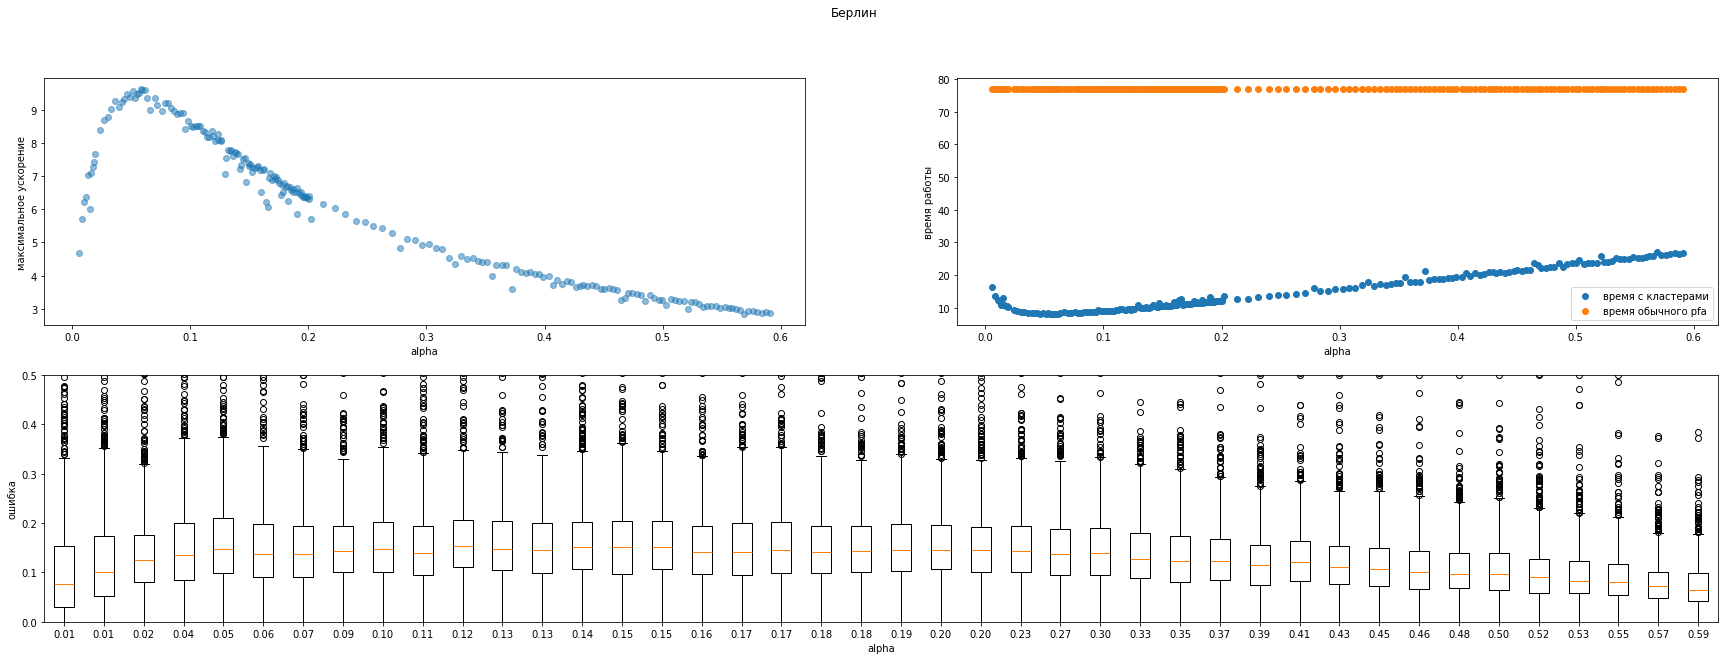

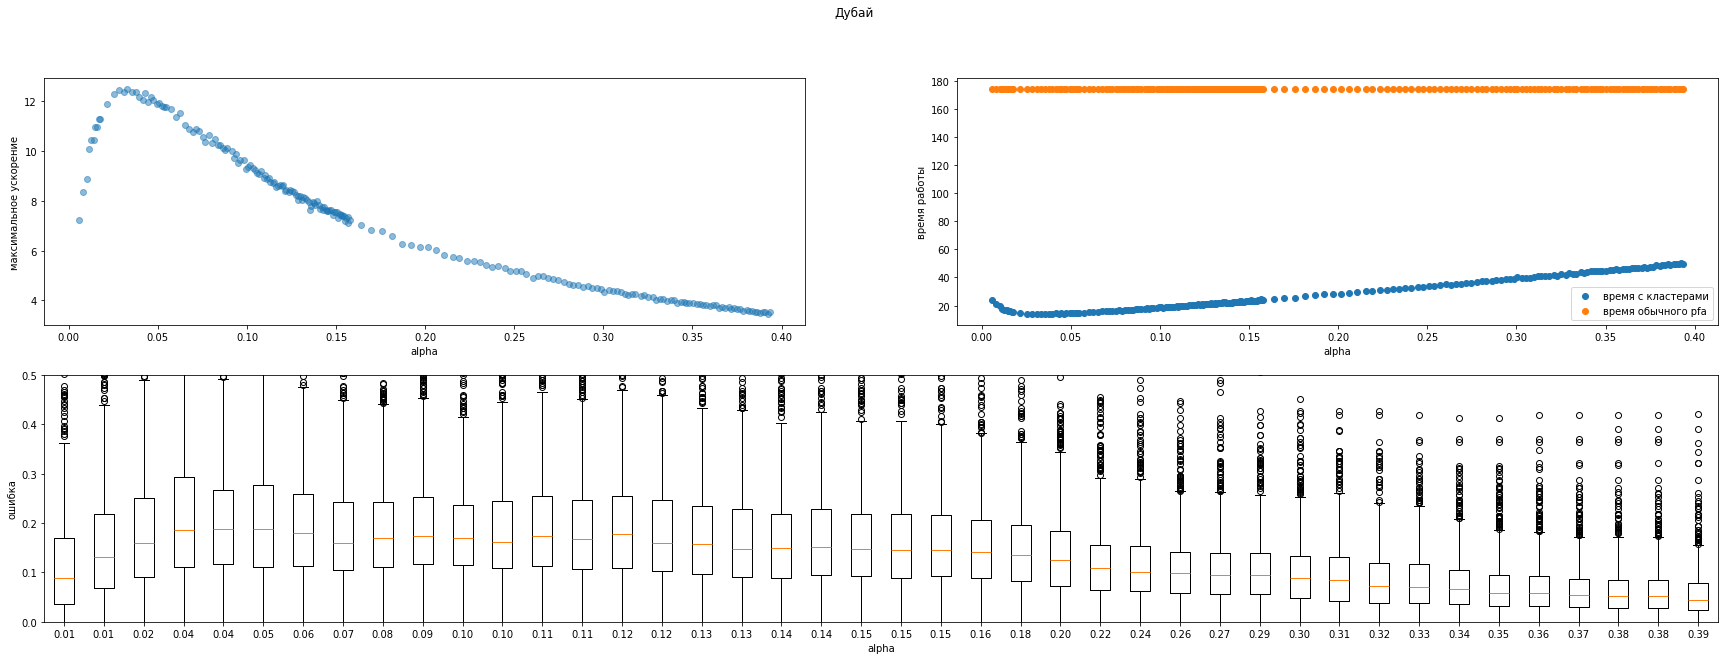

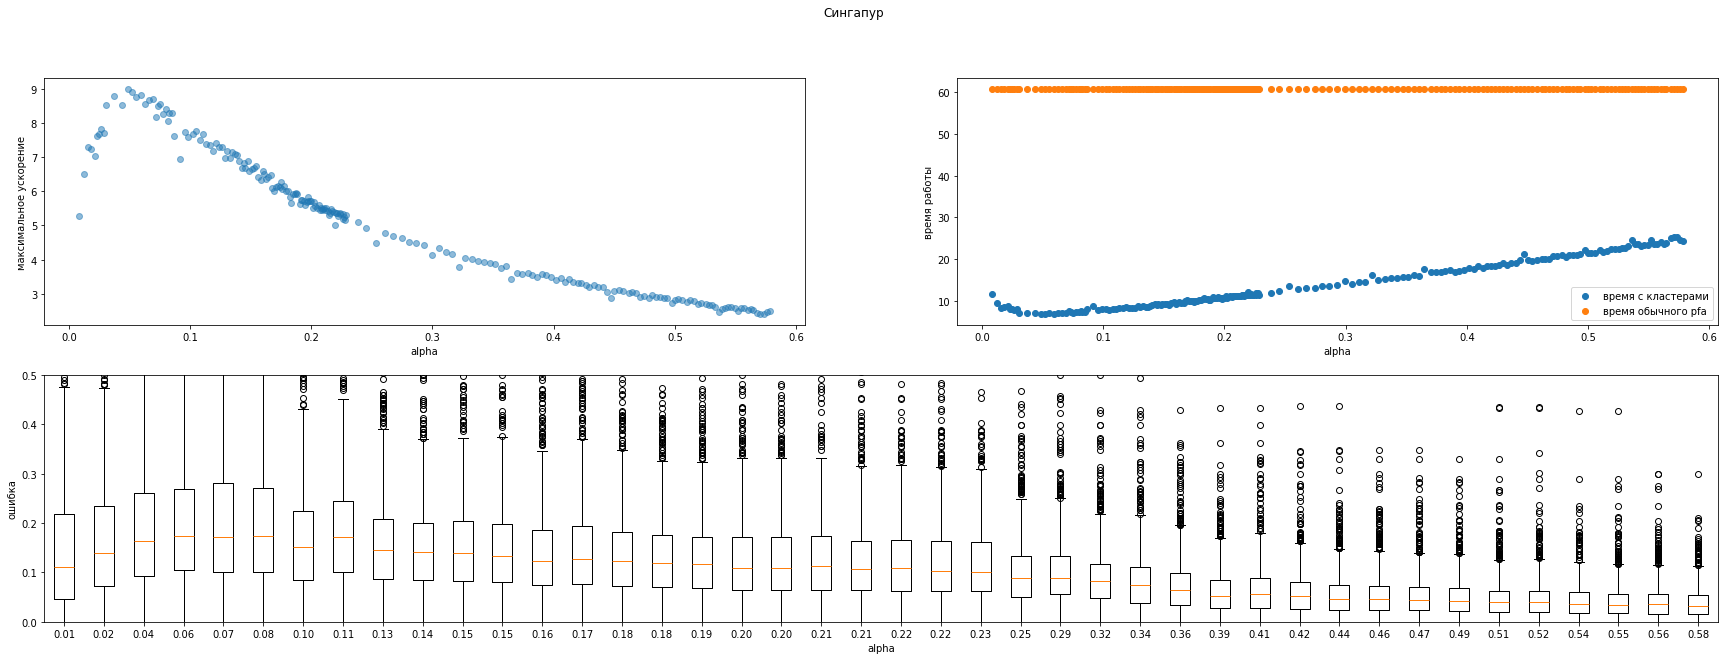

In [9]:
for name in r:
    print(name)
    res : CityResult = r[name]
    X = [pr.alpha for pr in res.points_results]
    fig = plt.figure()
    fig.set_figwidth(30)
    fig.set_figheight(10)

    gs = fig.add_gridspec(2,2)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, :])

    ax1.errorbar(X, [pr.speed_up[0] for pr in res.points_results] , fmt='o', alpha = 0.5)
    ax1.set(xlabel='alpha', ylabel='максимальное ускорение')
    Y_time =  np.array([pr.absolute_time[0] for pr in res.points_results])
    Y_time_usual =  np.array([pr.speed_up[0] for pr in res.points_results]) * Y_time
    ax2.errorbar(X, Y_time, fmt='o', label = 'время с кластерами')
    ax2.errorbar(X, Y_time_usual, fmt='o', label = 'время обычного pfa')
    ax2.set(xlabel='alpha', ylabel='время работы')
    ax2.legend()

    M = len(X)
    STEP = 5
    label = []
    for i in range(0,M,STEP):
        label.append('{:.2f}'.format(X[i]))

    data = [pr.errors for pr in res.points_results][:M:STEP]

    ax3.set(xlabel='alpha', ylabel='ошибка')
    print(len(data))
    print(len(label))
    ax3.set_ylim([0,0.3])
    ax3.boxplot(data, labels=label)


    fig.patch.set_alpha(1)
    plt.show()

Построим график ускорения от плотности

Уберем последние 4 точки